<a href="https://colab.research.google.com/github/yvesheri4/CMSE802/blob/main/Day22_PreClass_ANN3_tuning_YvesHERI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 22: PCA: Neural network part 3

### <p style='text-align: right;'> &#9989; Yves HERI.

## ___Learning objectives___

At the end of the exercise, you should be able to:
- Explain what hyperparameters can be tuned to improve ANN models,
- Explain approaches to initialize weights,
- Distinguish the most frequently used activation functions,
- Explain the purpose of optmiziers for finding weights.
- Define batch normalization and why it is important.

---
## ___Outline___

1. [Hyperparameters in neural network modeling](#hyper)
1. [Weight initialization](#weight)
1. [Activation functions](#act)
1. [Optimizers](#opt)
1. [Batch normalization](#batch)
1. [Assignment wrap-up](#wrapup)

---
## ___Setup___

🗒️ **Task:** Activate your `cmse802` environment and run the following.

In [1]:
import torch
import matplotlib.pyplot as plt
from torch.nn.functional import relu, hardtanh, hardswish, elu, selu, celu,   \
                                leaky_relu, prelu, rrelu, glu, gelu,          \
                                logsigmoid, hardshrink, tanhshrink, softsign, \
                                softplus, softmin, softmax, softshrink,       \
                                gumbel_softmax, log_softmax, tanh, sigmoid,   \
                                hardsigmoid, silu, mish

---
<a id="hyper"></a>

## ___Hyperparameters in neural network modeling___

The the past couple exercises, we introduce what Artificial Neural Networks (ANN) are and how they can be built, trained, and optimized to reduce overfitting. In this process, you:

1. Establish the network archtecture by defining an `nn.Module` subclass with:
   - Weight initialization scheme
   - Network architectural info:
     - Number of layers
     - Number of nodes,
   - Choice of activation function
   - Inclusion of dropout layer
1. Define a `train` function specifying:
   - Loss functions,
   - Optimizer
   - Number of epoches to train,
   - Learning rate,
   - Weight decay parameter
   - Early stopping patience

All the above are hyperparameters that need to be tuned.

🗒️ **Question:** In the past two classes, we have experimented with some of these hyperparameters. What are they?

✏️ **Answer:**

- Inclusion of dropout layer.
- Early stopping patience.

---
<a id="weight"></a>

## ___Weight Initialization___

🗒️ **Question:** Look into the documentation of [`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear). What is the default way to initiaize weights and biases?

✏️ **Answer:**

- Weight are initialized from $U(-\sqrt{k},\sqrt{k})$ where $k =\frac{1}{in\_features}$
- Bias (boolean) is initialized similarly to weight.

🗒️ **Task:** Check out the documentation for [`torch.nn.init`](https://pytorch.org/docs/stable/nn.init.html) which contain many methods for weight initiaztion. Pick __two__ of them, define what they are, and explain briefly how they works.

✏️ **Answer:**

`torch.nn.init.uniform_(tensor, a=0.0, b=1.0, generator=None)`: Fill the input Tensor with values drawn from the uniform distribution.

`torch.nn.init.normal_(tensor, mean=0.0, std=1.0, generator=None)`: Fill the input Tensor with values drawn from the normal distribution.

---
<a id="act"></a>

## ___Activation functions___

Pytorch has [a large number of activation functions](https://pytorch.org/docs/stable/nn.functional.html#non-linear-activation-functions) you could use, aside from the sigmoidal and ReLU we inroduced earlier.

[Optional] to learn more, check out [this article](https://machinelearningmastery.com/activation-functions-in-pytorch/), which is the basis of part of the exercise here.


🗒️ **Task:** Run the cell below that will depict what different activation functions will do to input values.

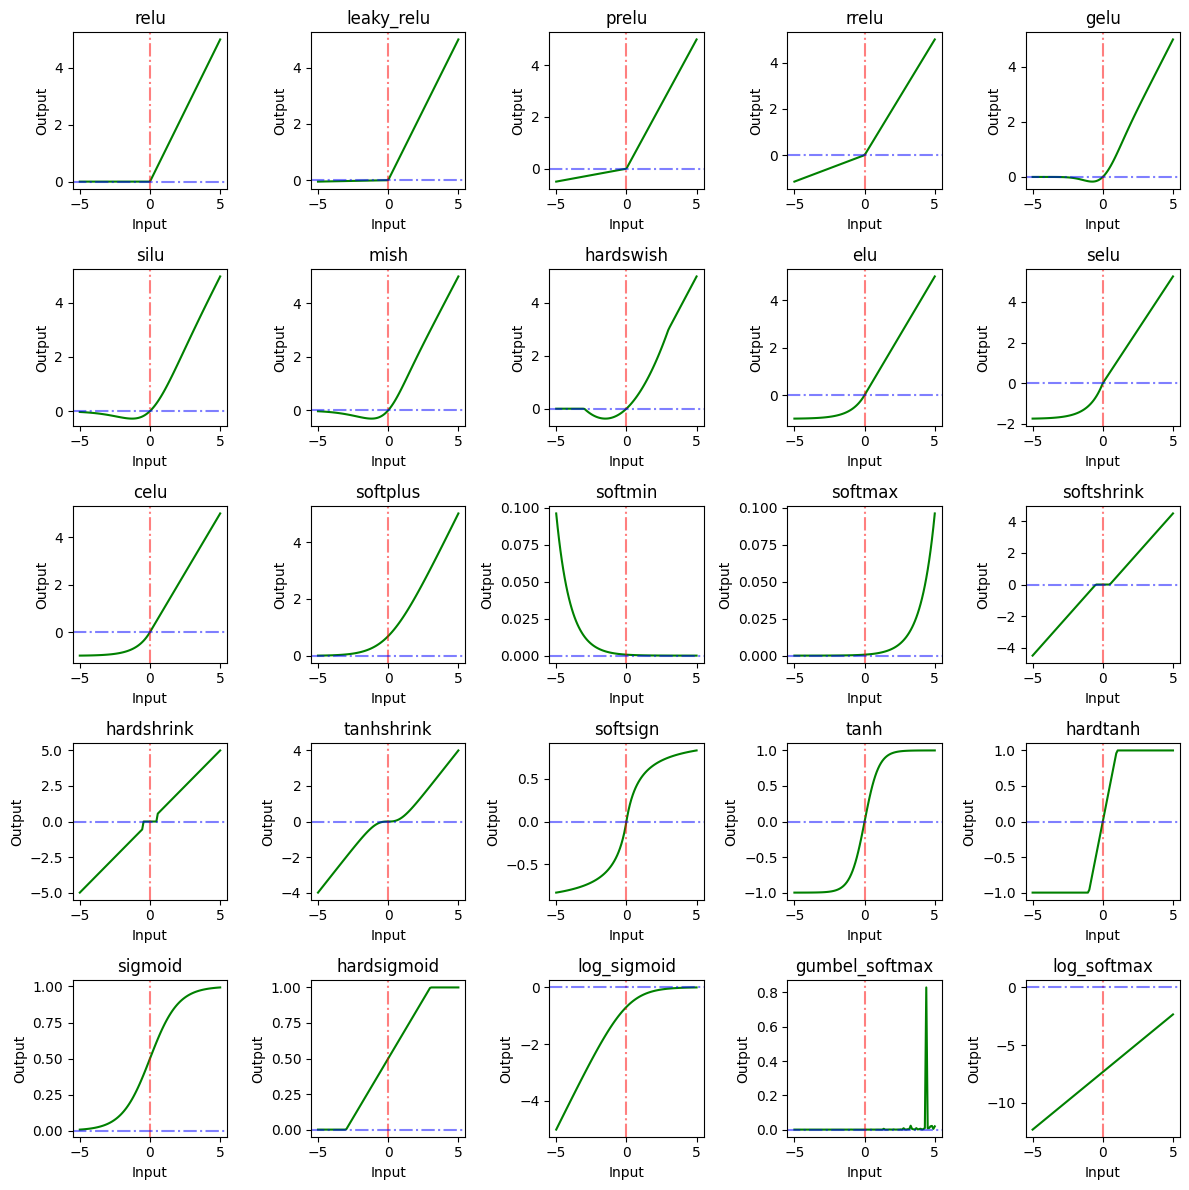

In [2]:
# put activation functions into a list, some (e.g., softmin, softmax) are not
# activation functions typically used, but included to illusrate their behavior
act_funcs = [relu, leaky_relu, prelu, rrelu, gelu, silu, mish, hardswish, elu,
             selu, celu, softplus, softmin, softmax, softshrink, hardshrink,
             tanhshrink, softsign, tanh, hardtanh, sigmoid, hardsigmoid,
             logsigmoid, gumbel_softmax, log_softmax]

# create a PyTorch tensor
x = torch.linspace(-5, 5, 100)

# apply the logistic activation function to the tensor

fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(12, 12))

for i, func in enumerate(act_funcs):
  # prelu need a weight parameter
  if func.__name__ == 'prelu':
    y = func(x, torch.tensor(0.1))
  elif func.__name__ in ['softmin', 'softmax', 'log_softmax']:
    y = func(x, dim=0)
  else:
    y = func(x)
  row = i // 5
  col = i % 5
  ax[row, col].plot(x.numpy(), y.numpy(), color='green')
  ax[row, col].set_title(func.__name__)
  ax[row, col].axvline(x=0, color='red', linestyle='dashdot', alpha=0.5)
  ax[row, col].axhline(y=0, color='blue', linestyle='dashdot', alpha=0.5)
  ax[row, col].set_xlabel('Input')
  ax[row, col].set_ylabel('Output')

plt.tight_layout()
plt.show()

🗒️ **Question:** Compare the activation functions in the 1st two rows, how do they differ? What do you think the impact of such subtle difference is using `relu` and `mish` as examples? For the 2nd question, provide a reference that discuss the difference between them and briefly summarize why we to care what activation function we use.

✏️ **Answer:**

The difference comes for the behavior of the activation function around zero and for negative values of the  input variable. Looking at the relu and the mish, we see that the mish function solves the non-differentiability problem of the relu around zero. The mathematical computation in every deep neural
network model includes a linear transformation followed by
an activation function. This activation function is the key
towards introducing non-linearity in the network. Some activation create vanishing-gradient problem, which slow down the optimization process. (https://lessw.medium.com/meet-mish-new-state-of-the-art-ai-activation-function-the-successor-to-relu-846a6d93471f.)

---
<a id="opt"></a>

## ___Optimizers___

### _What are the differences between GD, SGD, Adagrad, and Adam optimizers?_

There are a number of optimizers in Pytorch which are specified in the [`torch.optim`](https://pytorch.org/docs/stable/optim.html) module.

🗒️ **Question:** Watch [Optimzers - EXPLAINED](https://www.youtube.com/watch?v=mdKjMPmcWjY), then define and distinguish the following three optimizers.

- Gradient descent
- Stochastic gradient descent
- Adagrad
- Adam

✏️ **Answer:**

1. Gradient Descent (GD): Uses the entire dataset for updates, with a fixed learning rate. Slow but stable.
2. Stochastic Gradient Descent (SGD): Updates per data point or mini-batch, making it faster but noisier.
3. Adagrad: Adapts learning rates per parameter based on past gradients, good for sparse data.
4. Adam: Combines momentum and adaptive learning rates, efficient and versatile for most tasks.

### _Optional_

[Visually explained](https://www.youtube.com/watch?v=UmathvAKj80) has an excellent tutorial on how gradient descent works. It is worth looking into.

[The Neural Network Demystified Part 6](https://www.youtube.com/watch?v=9KM9Td6RVgQ) explained the LBFGS optimizier (Limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm) and how it will be implemented.

---
<a id="batch"></a>
## ___Batch normalization___

### _Another challenging issue with ANN_

ANN has an insane number of hyperparameters to tune. Aside from network architecture, you also need to tune a few other things to take care of the __unstable gradient problems__:
1. _Vanishing gradient:_
   - Gradients get smaller as the algorithm processes down to the lower (deeper) layers.
   - As a result, lower layers' connection weights virtually unchanged and training never converge to a good solution.
2. _Exploding gradient:_
   - Gradients get bigger with very large weight updates.
   - This results in a unstable model that is unable to learn anything from the data.

🗒️ **Question:** Look for resources online that explain why vanishing and exploding gradient problems happen. Put the resources you find in the cell below and briefly summarize why they occur.

✏️ **Answer:**

Vanishing gradients occur when small gradient values are repeatedly multiplied through layers, often due to activation functions like sigmoid or tanh, which squash values into small ranges, leading to near-zero updates. Exploding gradients happen when large gradients amplify excessively, usually from poor weight initialization or unstable layer operations, causing erratic or unstable training​. https://neptune.ai/blog/vanishing-and-exploding-gradients-debugging-monitoring-fixing

### _Solution to unstable gradient problems_

Three common approaches for dealing with vanishing gradient problems are to:
- Pick a good weight initialization scheme, we have done that.
- Use a good activation function.
- Choose a proper learning rate.
- Apply __batch normalization__.

What is batch normalization:
- ANN trainining is done in __batches__, i.e., sets of instances.
- Batch normalization makes sure that the the inputs to the next layer are normalized so they do not contribute to near-zero gradients.

Good:
- Control for vanishing gradient problem.
- Can use much larger learning rates that speed up learning.
- Act like a regularizer that reduce overfitting.

Not so good:
- Need to learn addition paramters - so predction is slower.

🗒️ **Question:** Find additional online resources that discussed unstable gradient problems and batch normalization. How do they explain why batch normalization can alleviate the unstable gradient problem?

In addition to answering the above questions, provide the info of the resources you used to find the answers.

✏️ **Answer:**

Batch normalization reduces unstable gradient problems by normalizing layer inputs to have zero mean and unit variance during training, addressing issues like vanishing/exploding gradients. It also includes learnable parameters to maintain model expressiveness, stabilizing training and enabling faster convergence with higher learning rates. https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/

---
## Assignment wrap-up
<a id="assignment-wrap-up"></a>

[Back to TOC](#table-of-contents)
<a id="table-of-contents"></a>

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!** If running the cell doesn't work in VS Code copy the link `src` and paste in the browser. Make sure to sign in with your MSU email.

In [ ]:
from IPython.display import HTML
HTML(
'''
<iframe
    src="https://forms.office.com/r/4y465sBvXa"
    width="800px"
    height="600px"
    frameborder="0"
    marginheight="0"
    marginwidth="0">
    Loading...
</iframe>
'''
)


## Congratulations, you're done with your pre-class assignment!
<a id="congratulations-youre-done-with-your-pre-class-assignment"></a>

[Back to TOC](#table-of-contents)

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for the appropriate pre-class submission folder. (Don't forget to add your name in the first cell).

---

© 2024 Michigan State University. This material was created for the Department of Computational Mathematics, Science and Engineering (CMSE) at Michigan State University.